In [9]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import pandas as pd

In [52]:
# {1:crack,2:scratch, 3:tire flat, 4:dent,5:glass shatter,6:lamp broken}
class_names = ['crack', 'scratch', 'tire flat', 'dent', 'glass shatter', 'lamp broken']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)
print(class_names_label)
print(nb_classes)

{'crack': 0, 'scratch': 1, 'tire flat': 2, 'dent': 3, 'glass shatter': 4, 'lamp broken': 5}
6


In [11]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 06C6-74B6

 Directory of C:\Users\madhav.kumar\Documents\AI-ML-DS\Image Classification

15-12-2023  12.09 PM    <DIR>          .
15-12-2023  12.09 PM    <DIR>          ..
14-12-2023  12.13 PM    <DIR>          .ipynb_checkpoints
04-12-2023  12.54 PM       363,152,213 archive (2).zip
05-12-2023  11.53 AM                72 Exploratory Data Analysis(EDA).ipynb
05-12-2023  11.52 AM           389,834 image-classification-using-cnn-94-accuracy.ipynb
15-12-2023  12.09 PM           152,770 image_classifficatin_car_insurance.ipynb
15-12-2023  11.30 AM         1,730,668 image_classification_intel_data.ipynb
13-12-2023  03.51 PM    <DIR>          intel_data
22-11-2023  12.11 PM           134,325 kbs.ipynb
13-12-2023  03.52 PM    <DIR>          Ripik_AI
03-12-2023  04.19 PM            35,616 sample_submission-3.csv
               7 File(s)    365,595,498 bytes
               5 Dir(s)  312,763,240,448 bytes free


In [26]:
# Function to get label by filename
def get_label_by_filename(df, filename):
    try:
        label = df[df['filename'] == filename]['label'].values[0]
        return label
    except IndexError:
        return f"No label found for filename: {filename}"


In [19]:
# making data frame from csv file
data = pd.read_csv("Ripik_AI/train/train.csv")
data.head()

,image_id,filename,label
0,1,1.jpg,2
1,2,2.jpg,4
2,3,3.jpg,2
3,4,4.jpg,3
4,5,5.jpg,5


In [39]:
def load_data():
    datasets = ['Ripik_AI/train/images']
    output = []
    # count = 0
    
    for dataset in datasets:
            
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
    
        for file in tqdm(os.listdir(dataset)):
            
            # Get the path name of the image
            img_path = os.path.join(dataset, file)

             # Open and resize the img
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE) 

            # Append the image and its corresponding label to the output
            images.append(image)
            labels.append(get_label_by_filename(data, file))
            
            # print(file)
            # count += 1
            # print(get_label_by_filename(data, file))
            # if count == 5:
            #     count=0
            #     break
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))
    
    return output    

In [40]:
(train_images, train_labels) = load_data()[0]

Loading Ripik_AI/train/images


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7200/7200 [01:10<00:00, 101.48it/s]


In [41]:
print(train_labels)

[2 5 6 ... 4 4 2]


In [42]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [43]:
n_train = train_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 7200
Each image is of size: (150, 150)


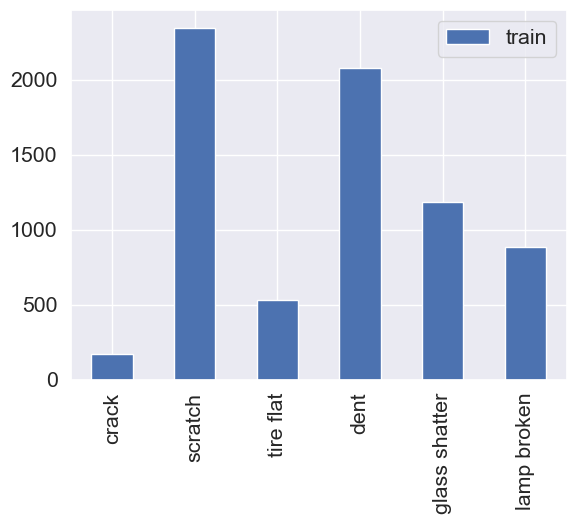

In [44]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
pd.DataFrame({'train': train_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

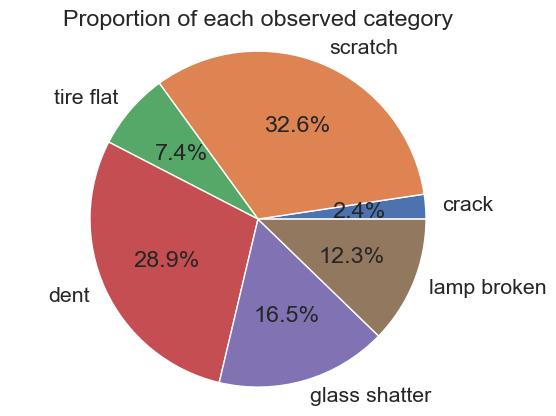

In [45]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [46]:
train_images = train_images / 255.0 

In [53]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]-1])
    plt.show()

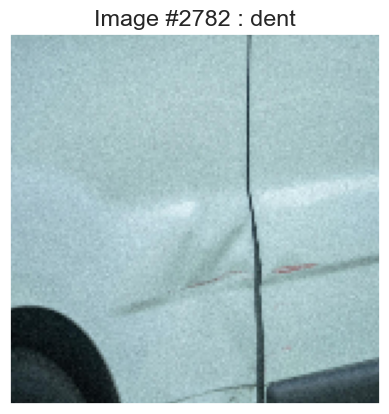

In [57]:
display_random_image(class_names, train_images, train_labels)

In [58]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]-1])
    plt.show()

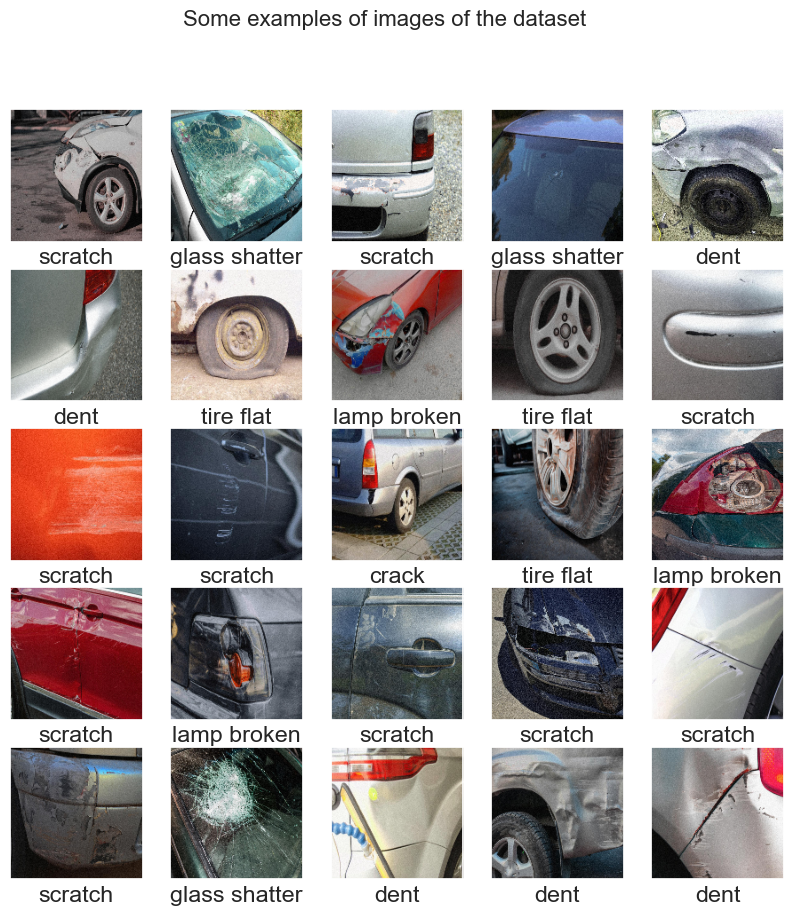

In [59]:
display_examples(class_names, train_images, train_labels)